# HW1 野村證卷初步資料EDA
作為初步的資料EDA，並沒有拿到完整的資料，總共的資料只有約莫100筆，導致許多資料清洗的部分我認為由於比例實在太低（大多1到2筆），不然就是可用資料比例太低，決定日後拿到較完整資料後再一次進行。但即使只有這100筆左右的資料，視覺化後依然可以觀察到一些趨勢與現象。

In [1]:
import pandas as pd
xls = pd.ExcelFile('CRM.xlsx')
df = pd.read_excel(xls, 'OnshoreData')

import matplotlib.font_manager as mfm
font_path = "./chinese.simhei.ttf"
prop = mfm.FontProperties(fname = font_path)

首先我先用Pandas把excel檔讀進來，並對海內交易做分析，因此選擇`OnshoreData`。<br>
接著為了方便做圖時使用中文，我在資料夾下放了一個ttf字體檔。

In [2]:
address = df['censusaddress']
addr_dict = dict()
for i in address:
    temp = i[0:3]
    if(temp in addr_dict.keys()):
        addr_dict[temp] += 1
    else:
        addr_dict[temp] = 1

接著我用dictionary，針對每筆交易的客戶地址進行統計分析。

<BarContainer object of 16 artists>

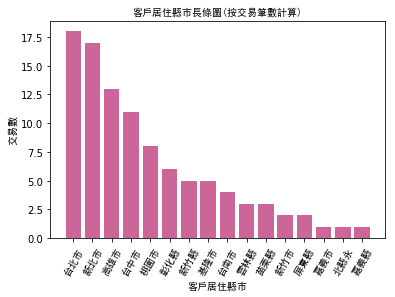

In [9]:
import matplotlib.pyplot as plt
addr_dict = dict(sorted(addr_dict.items(), key = lambda x:x[1], reverse = True))
keys = list(addr_dict.keys())
values = list(addr_dict.values())
plt.title("客戶居住縣市長條圖(按交易筆數計算)", fontproperties = prop)
plt.ylabel("交易數", fontproperties = prop)
plt.xlabel("客戶居住縣市", fontproperties = prop)
plt.xticks(range(len(keys)), keys, fontproperties = prop, rotation = 60)
plt.bar(range(len(values)), values, color='#CC6699', width=0.8, align='center', edgecolor='none')

## 非連續性長條圖
接著可以用長條圖得知交易筆數高的地區，與發展程度高、人口數較高的城市有較高的相關性（由台北、新北、高雄、台中等城市領銜）。

In [4]:
genders = df["gendercode"]
gender_dict = dict()
for i in genders:
    if(i in gender_dict.keys()):
        gender_dict[i] += 1
    else:
        gender_dict[i] = 1

In [5]:
webmember_status = df["webmember"]
webmember_dict = dict()
for i in webmember_status:
    if(i in webmember_dict.keys()):
       webmember_dict[i] += 1
    else:
        webmember_dict[i] = 1

接著我用data裡面的網路會員與性別等標籤探討客戶的組成。

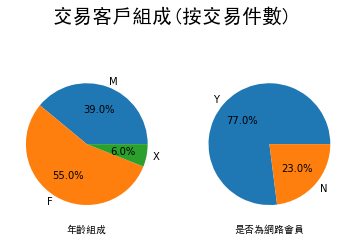

In [6]:
plt.subplot(1, 2, 1)
plt.pie(list(gender_dict.values()) , labels = list(gender_dict.keys()), autopct='%1.1f%%')
plt.xlabel('年齡組成', fontproperties = prop)

plt.subplot(1, 2, 2)
plt.pie(list(webmember_dict.values()) , labels = list(webmember_dict.keys()), autopct='%1.1f%%')
plt.xlabel('是否為網路會員', fontproperties = prop)
plt.suptitle('交易客戶組成(按交易件數)', fontproperties = prop, fontsize=20)
plt.show()

## 圓餅圖分析
可以發現就目前的資料而言，女性較男性為多，並且網路會員有在數量上佔有明顯的多數（性別X在此處代表並非個人帳戶）。

In [7]:
births = df["birthdate"]
birth_dict = dict()
for i in range(1900, 2019):
    birth_dict[i] = 0
count = 0
for i in births:
    temp = int(str(i)[0:4])
    birth_dict[temp] += 1

最後針對客戶出生年齡我也是整理了連續性的統計資料。

<BarContainer object of 12 artists>

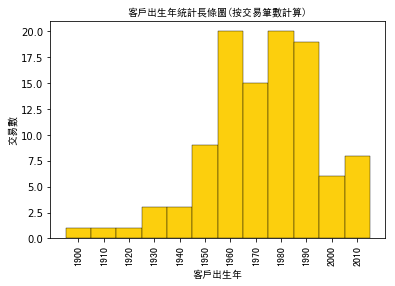

In [8]:
import matplotlib.pyplot as plt
keys = list(birth_dict.keys())
values = list(birth_dict.values())
list_by_10_year = dict()
counter, temp_year = 0, 1900
for i in keys:
    if(counter % 10 == 0):
        list_by_10_year[i] = 1
        temp_year = i
    else:
        list_by_10_year[temp_year] += birth_dict[i]
    counter += 1
list_by_10_year
plt.title("客戶出生/公司註冊年統計長條圖(按交易筆數計算)", fontproperties = prop)
plt.ylabel("交易數", fontproperties = prop)
plt.xlabel("客戶出生/公司註冊年份", fontproperties = prop)
plt.xticks(range(len(list(list_by_10_year.keys()))), list(list_by_10_year.keys()), fontproperties = prop, rotation = 90)
plt.bar(range(len(list(list_by_10_year.values()))), list(list_by_10_year.values()), color = '#fccf0d', edgecolor='#000000', width=1.0, lw=0.4)

## 連續性的長條圖
由於年份涵蓋範圍較大(從1900年~2017年皆有)，我對年份的統計資料進行了微幅的更動，將每十年作為一個區段集中計算。最後從長條圖的結果可以發現1950~1990這段時間註冊/出生的客戶交易情形最為活躍。